# Scratchmark

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.9.0+cpu'

In [3]:
#create kbow parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(x), len(y)

(50, 50)

In [5]:
#Spliting data
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=x_train,
                        train_labels=y_train,
                        test_data=x_test,
                        test_labels=y_test,
                        predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions") 
    plt.legend(prop={"size": 14})
    plt.show()

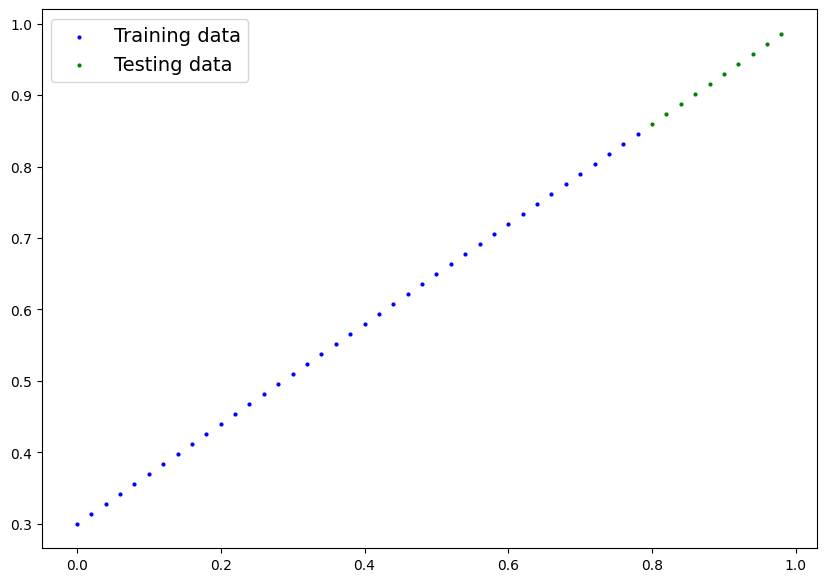

In [7]:
plot_predictions()

Pierwszy model

Co robi:
- zaczyna z przypadkowymi wartościami (weight i bias)
- patrzy na dane treningowe i dostosowuje wartości przypadkowe by w lepszy sposób reprezentować wartości idealne

Jak tego dokonuje:
Poprzez dwa algorytmy ->
- gradient descent - algorytm odpowiedizlany za znalezienie minimum funkcji błędu, czyli takich wag, które najlepiej dopasowują się do danych treningowych
- backpropagation - algorytm, który efektywnie oblicza pochodne błędu względem wszystkich wag przy użyciu reguły łańcuchowej z rachunku różniczkowego.


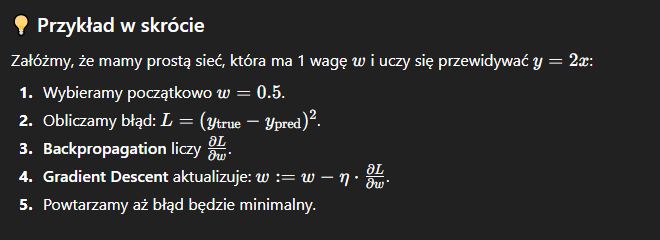

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias # linear regression formula

In [9]:
# create random seed
torch.manual_seed(42)  

model_0 = LinearRegressionModel()

#chceck out the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
# make predictions with model
with torch.inference_mode():
    y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

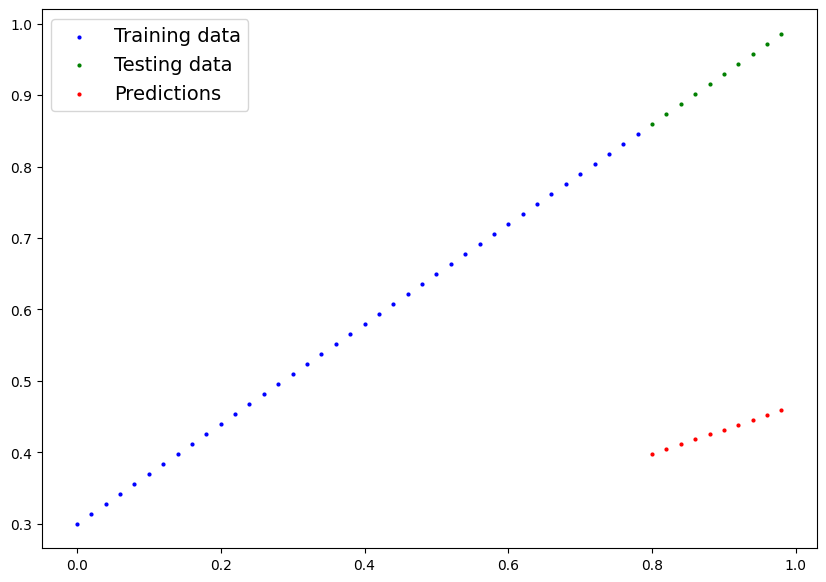

In [12]:
plot_predictions(predictions=y_preds)

Train Model

Założeniem uczenia maszyny jest przejście z parametrów nieznanych (mogą być losowe) do znanych.

Jedną z metod do obserwacji na ile model odbiega od perfekcji jest stosowanie "loss function".

Potrzebne do wytrenowania modelu:
- loss function - jak zły jest model; również nazywana criterion
- optimizer - bierze pod uwagę stratę modelu i reguluje parametry modelu (np. wagi i bajas) aby poprawić funkcję strat

- traning loop
- testing loop

torch.nn dysponuje wieloma funkcjami straty, do każdego zadania należy wybrać odpowiednią

In [13]:
# loss function
loss_fn = nn.L1Loss()

loss_fn

L1Loss()

In [14]:
# optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate <- im większe tym bardziej zmienia parametry

Traning loop

Stages:
- Loop through the data
- Forward pass (this involves our data moving through our model's :forward()" functions) also propagation
- Calculate the loss
- Optimizer zero grad
- Loss backward - moves backward through the network to calculate the3 gradients of each of the parameters of our model with redpect to the loss (**backpropagation**)
- Optimizer step (**gradient descent**)

In [15]:
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# loop through the data
for epoch in range(epochs):
    model_0.train() # set the model to training mode

    # forward pass
    y_preds = model_0(x_train)

    # calculate the loss
    loss = loss_fn(y_preds, y_train)

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

    # testing
    model_0.eval() # turns off gradient tracking
    with torch.inference_mode():
        # 1. forward pass
        test_pred = model_0(x_test)

        # 2. calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())


Epoch: 0 | Train loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Train loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Train loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Train loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Train loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Train loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Train loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias':

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [17]:
weight, bias

(0.7, 0.3)

In [18]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)

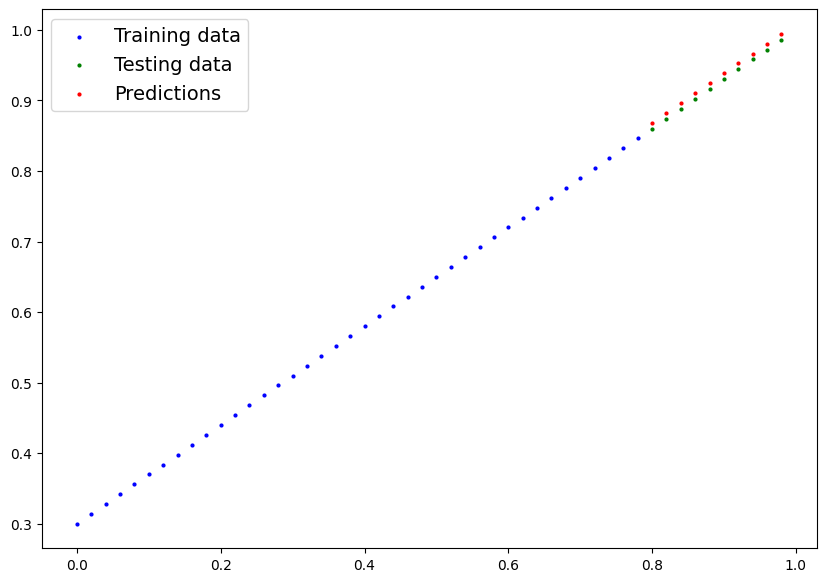

In [19]:
plot_predictions(predictions=y_preds_new)

C:\Users\julia\AppData\Local\Temp\ipykernel_17320\1593724805.py:4: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  plt.plot(epoch_count, np.array(torch.tensor(loss_values)), label="Train Loss")


Text(0, 0.5, 'Loss')

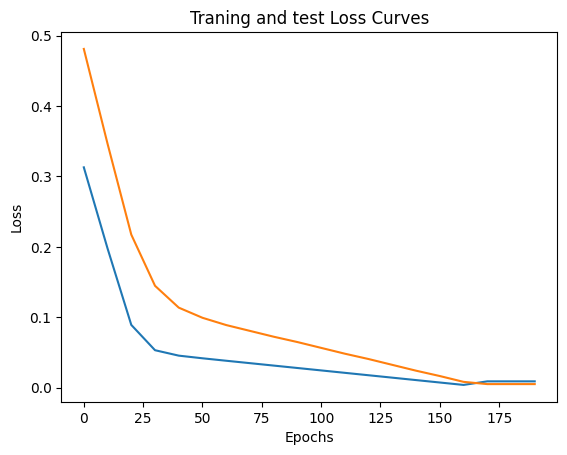

In [20]:
import numpy as np

# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values)), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Traning and test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Saving model

There are three main methods:
- 'torch.save()' - allows to save PyTorch object in Phytons pickle format
- 'torch.load()' - allows to load a saved PyTorch object
- ' torch.nn.Module.load_state_dict()' - allows to load s model's saved state dictionary

In [22]:
from pathlib import Path

# Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "model_workflow_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\model_workflow_0.pth


Loading model

In [24]:
# To load in a saved model we need to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
print(loaded_model_0.state_dict())

# Load saved state_dict()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
print(loaded_model_0.state_dict())

OrderedDict({'weights': tensor([-1.1229]), 'bias': tensor([-0.1863])})
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})


Predictions with our loaded model

In [25]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [26]:
# loded model preds vs orginal model preds
y_preds_new == loaded_model_preds 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Puting all together

## imports

In [42]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Data

In [43]:
weight = 0.2
bias = 0.5

# Create range values
start = 0
end = 1 
step = 0.02

# Create x and y
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.5000],
         [0.5040],
         [0.5080],
         [0.5120],
         [0.5160],
         [0.5200],
         [0.5240],
         [0.5280],
         [0.5320],
         [0.5360]]))

Train split

In [53]:
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

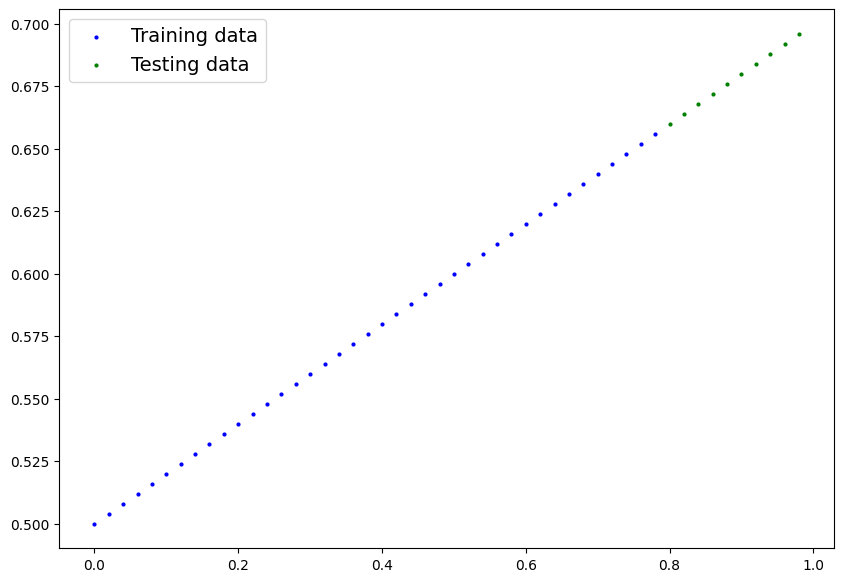

In [58]:
plot_predictions(x_train, y_train, x_test, y_test)

## Building linear model

In [46]:
# Create linear model class by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.Linear() to create linear model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1) # on one data in for one data out
    
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.linear_layer(x)
    
# set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()
        

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

## Training model

In [47]:
# setup loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

torch.manual_seed(42)

epochs = 400

for epoch in range(epochs):
    model_1.train()
    
    # forward pass
    y_pred = model_1(x_train)
    
    # calculate loss
    loss = loss_fn(y_pred, y_train)

    # optimizer zero grad
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # optimizer step
    optimizer.step()

    # testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(x_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5501779317855835 | Test loss: 0.8189762234687805
Epoch: 10 | Train loss: 0.4349680542945862 | Test loss: 0.6842663288116455
Epoch: 20 | Train loss: 0.31975817680358887 | Test loss: 0.5495565533638
Epoch: 30 | Train loss: 0.20454831421375275 | Test loss: 0.4148467481136322
Epoch: 40 | Train loss: 0.11423780769109726 | Test loss: 0.2978220582008362
Epoch: 50 | Train loss: 0.08156545460224152 | Test loss: 0.22615671157836914
Epoch: 60 | Train loss: 0.07047799974679947 | Test loss: 0.18537437915802002
Epoch: 70 | Train loss: 0.06539379060268402 | Test loss: 0.16223064064979553
Epoch: 80 | Train loss: 0.06165901944041252 | Test loss: 0.14849868416786194
Epoch: 90 | Train loss: 0.05816902592778206 | Test loss: 0.13747861981391907
Epoch: 100 | Train loss: 0.05469182878732681 | Test loss: 0.1271454393863678
Epoch: 110 | Train loss: 0.05125302076339722 | Test loss: 0.11887288093566895
Epoch: 120 | Train loss: 0.047818779945373535 | Test loss: 0.11128721386194229
Epoch: 

In [48]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2065]])),
             ('linear_layer.bias', tensor([0.5035]))])

In [49]:
weight, bias

(0.2, 0.5)

## Predictions

In [50]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(x_test)

y_preds

tensor([[0.6687],
        [0.6728],
        [0.6770],
        [0.6811],
        [0.6852],
        [0.6894],
        [0.6935],
        [0.6976],
        [0.7018],
        [0.7059]])

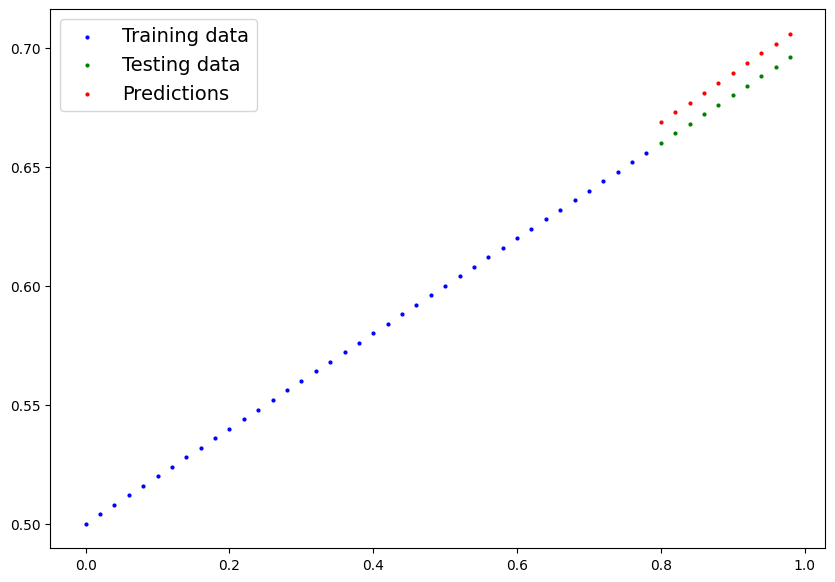

In [56]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(x_test)
plot_predictions(x_train, y_train, x_test, y_test, y_preds)

## Saving model

In [59]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "model_workflow_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

## Load model

In [60]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# just to check :)
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2065]])),
             ('linear_layer.bias', tensor([0.5035]))])

In [ ]:
# also just checking ;)
loaded_model_1.eval()
with torch.inference_mode():
    y_preds_1 = loaded_model_1(x_test)

y_preds_1 == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Exervises

Maybe for later